In [1]:
import numpy as np
import pandas as pd
from math import factorial
from matplotlib import pyplot as plt
plt.style.use('seaborn-whitegrid')

### Задача 1

Контрольная работа состоит из пяти вопросов. На каждый вопрос приведено четыре варианта ответа, один из которых правильный. Составьте закон распределения числа правильных ответов при простом угадывании. Найдите M(X), D(X).

In [2]:
def combinations(n, k):
    return factorial(n) / (factorial(k) * factorial(n - k))

In [3]:
def bernoulli(n, k, p):
    return combinations(n, k) * pow(p, k) * pow(1 - p, n - k)

In [4]:
n = 5 # 5 вопросов
p = 1 / 4 # 4 варианта ответов

In [5]:
P = [bernoulli(n, k, p) for k in range(n + 1)]

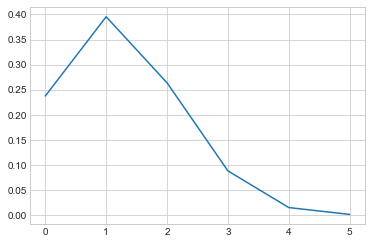

In [6]:
plt.plot(P)
plt.show()

In [7]:
for k in range(n + 1):
    print(f'Вероятность угадать {k} вопрос/ов/а составляет {P[k] * 100:.2f}%')

Вероятность угадать 0 вопрос/ов/а составляет 23.73%
Вероятность угадать 1 вопрос/ов/а составляет 39.55%
Вероятность угадать 2 вопрос/ов/а составляет 26.37%
Вероятность угадать 3 вопрос/ов/а составляет 8.79%
Вероятность угадать 4 вопрос/ов/а составляет 1.46%
Вероятность угадать 5 вопрос/ов/а составляет 0.10%


In [8]:
print('M(X) =', n * p)

M(X) = 1.25


In [9]:
print('D(X) =', n * p * (1 - p))

D(X) = 0.9375


### Задача 2

Пользователь получает в среднем 10 писем со спамом на свой почтовый ящик за сутки. Найти число N, такое, что с вероятностью 0.95 пользователь получит не более N писем со спамом за текущий день.

In [10]:
def poisson(k, lambda_):
    return pow(lambda_, k) * np.exp(-lambda_) / factorial(k)

In [11]:
lambda_ = 10 # в среднем 10 писем со спамом
N, p = 0, 0

In [12]:
while p <= 0.95:
    p = sum(poisson(i, lambda_) for i in range(N + 1)) # вероятность получить не более N писем со спамом
    N += 1

In [13]:
print('N =', N - 1) # нужно нивелировать последнюю итерацию N+=1 в цикле

N = 15


### Задача 3

Производятся выстрелы по мишени. Вероятность попадания в мишень при одном выстреле равна 0.01. Сколько выстрелов нужно сделать чтобы быть уверенным с вероятностью 0.9, что хотя бы 6 раз будет совершено попадание?

In [14]:
p = 0.01
n, P = 5, 0

Хотя бы 6 раз эквивалентно: $P(X \geq 6) = 1 - P(X \leq 5)$

In [15]:
while P <= 0.9:
    P = 1 - sum(bernoulli(n, i, p) for i in range(6)) # вероятность попасть хотя бы 6 раз
    n += 1

In [16]:
print(f'Нужно сделать {n - 1} выстрелов') # нивелируем последнюю итерацию n+=1 в цикле

Нужно сделать 926 выстрелов
